# 🗂️ Text Classification on 20 Newsgroups Dataset

## 🔍 Overview

We will perform multi-class text classification using the 20 Newsgroups dataset. The goal is to predict the category of a news article based on its text content.


**We will use the following ML models:**
* Logisitc Regression 🤖
* Naive Bayes 📈
* SVM ⚔️
* Random Forest 🌲
* XGBoost 🚀


**Key steps include:**
* Loading and exploring the dataset
* Text preprocessing using TF-IDF Vectorization
* Training models and evaluating performance
* Comparing models visually and numerically



In [ ]:
# !pip install xgboost


## 📊 1. Data Loading and Exploration



In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd


In [ ]:
# Load both training and test sets for full pipeline
categories = None  # Set to list of 20 categories; use specific ones for subset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert to DataFrame for easier handling
df_train = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})
df_test = pd.DataFrame({'text': newsgroups_test.data, 'target': newsgroups_test.target})

print("Number of Training Samples:", len(df_train))
print("Number of Test Samples:", len(df_test))
print("Number of Categories:", len(newsgroups_train.target_names))

# Display sample
df_train.head()


Number of Training Samples: 11314
Number of Test Samples: 7532
Number of Categories: 20


,text,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


### 🔍 Data Insight and Target Names



In [ ]:
df_train['target'].value_counts()

,count
target,
10,600
15,599
8,598
9,597
11,595
13,594
7,594
14,593
5,593


In [ ]:
# List all categories
for idx, category in enumerate(newsgroups_train.target_names):
    print(f"{idx}: {category}")


0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


In [ ]:
# Clean text function
import re
import nltk
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## ✨ 2. Preprocessing and TF-IDF Vectorization



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform training data; transform test data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])

y_train = df_train['target']
y_test = df_test['target']

print("Shape of TF-IDF matrix:", X_train_tfidf.shape)


Shape of TF-IDF matrix: (11314, 101295)


## ⚙️ 3. Model Training and Evaluation Functions


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define training functions
def train_naive_bayes(X_train, y_train):
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    return nb_model

def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def train_xgboost(X_train, y_train):
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    return xgb_model


def train_logistic_regression(X_train, y_train):
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)
    return lr_model


def train_svm(X_train, y_train):
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    return svm_model

# Evaluate and visualize
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {model_name} Accuracy: {acc:.4f}\n")
    print(f"🔹 Classification Report for {model_name}:")
    # Use all target names instead of just the first 5
    print(classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, cmap='Blues', annot=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    return acc


## 🚀 4. Train Models

🔹 Logistic Regression Accuracy: 0.6914

🔹 Classification Report for Logistic Regression:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.46      0.48       319
           comp.graphics       0.63      0.71      0.67       389
 comp.os.ms-windows.misc       0.65      0.62      0.64       394
comp.sys.ibm.pc.hardware       0.68      0.64      0.66       392
   comp.sys.mac.hardware       0.75      0.69      0.72       385
          comp.windows.x       0.84      0.73      0.78       395
            misc.forsale       0.75      0.79      0.77       390
               rec.autos       0.76      0.71      0.73       396
         rec.motorcycles       0.48      0.81      0.60       398
      rec.sport.baseball       0.82      0.82      0.82       397
        rec.sport.hockey       0.91      0.87      0.89       399
               sci.crypt       0.90      0.66      0.76       396
         sci.electronics       0.56      0.61      0

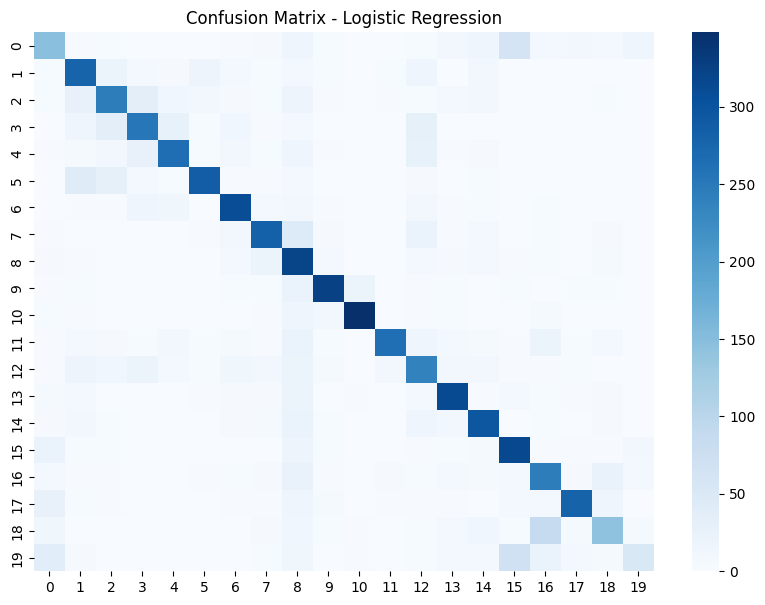

🔹 Naive Bayes Accuracy: 0.6799

🔹 Classification Report for Naive Bayes:
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.18      0.30       319
           comp.graphics       0.67      0.69      0.68       389
 comp.os.ms-windows.misc       0.66      0.59      0.62       394
comp.sys.ibm.pc.hardware       0.60      0.74      0.66       392
   comp.sys.mac.hardware       0.77      0.67      0.72       385
          comp.windows.x       0.81      0.77      0.79       395
            misc.forsale       0.77      0.77      0.77       390
               rec.autos       0.83      0.73      0.78       396
         rec.motorcycles       0.87      0.74      0.80       398
      rec.sport.baseball       0.93      0.80      0.86       397
        rec.sport.hockey       0.57      0.93      0.71       399
               sci.crypt       0.59      0.79      0.68       396
         sci.electronics       0.71      0.52      0.60       393
  

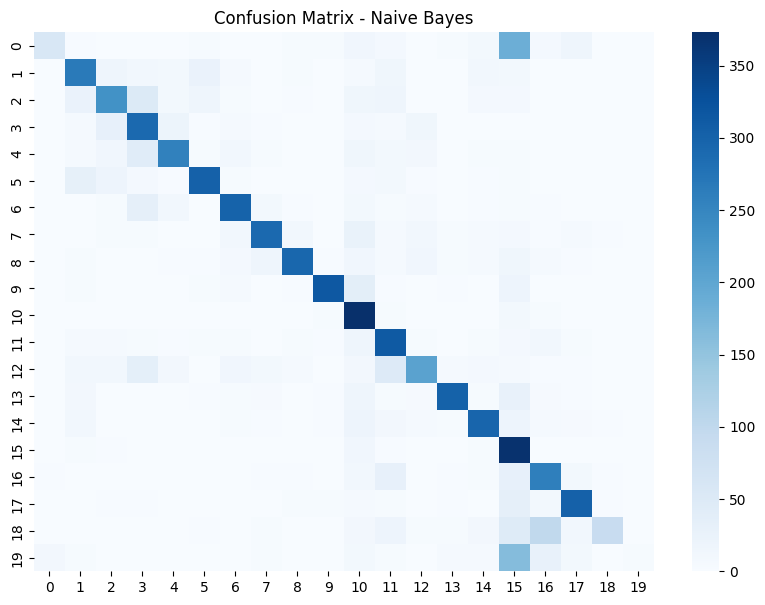

🔹 Support Vector Machine Accuracy: 0.6747

🔹 Classification Report for Support Vector Machine:
                          precision    recall  f1-score   support

             alt.atheism       0.48      0.47      0.47       319
           comp.graphics       0.60      0.71      0.65       389
 comp.os.ms-windows.misc       0.65      0.61      0.63       394
comp.sys.ibm.pc.hardware       0.65      0.66      0.66       392
   comp.sys.mac.hardware       0.73      0.65      0.69       385
          comp.windows.x       0.86      0.66      0.75       395
            misc.forsale       0.77      0.78      0.77       390
               rec.autos       0.65      0.73      0.68       396
         rec.motorcycles       0.45      0.79      0.58       398
      rec.sport.baseball       0.81      0.78      0.79       397
        rec.sport.hockey       0.92      0.82      0.87       399
               sci.crypt       0.89      0.68      0.77       396
         sci.electronics       0.56      0.61 

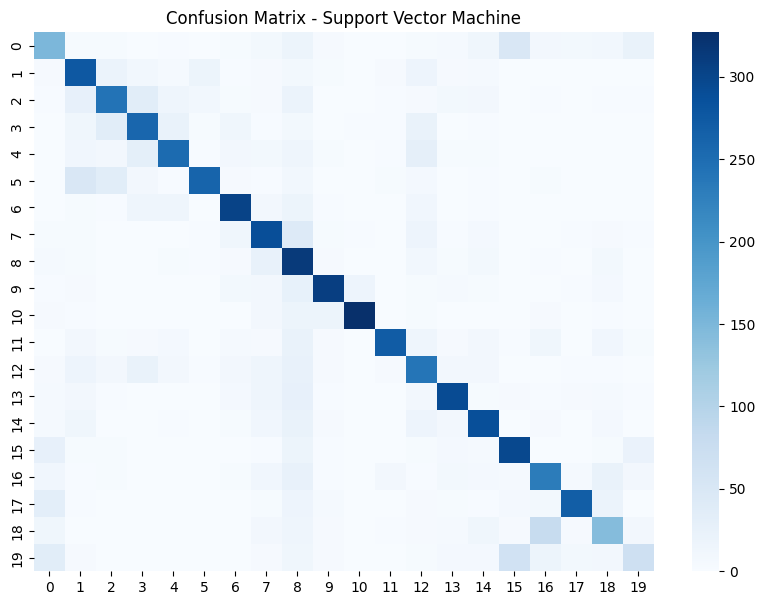

🔹 Random Forest Accuracy: 0.6298

🔹 Classification Report for Random Forest:
                          precision    recall  f1-score   support

             alt.atheism       0.44      0.37      0.40       319
           comp.graphics       0.60      0.60      0.60       389
 comp.os.ms-windows.misc       0.57      0.66      0.61       394
comp.sys.ibm.pc.hardware       0.61      0.58      0.59       392
   comp.sys.mac.hardware       0.63      0.67      0.65       385
          comp.windows.x       0.66      0.67      0.66       395
            misc.forsale       0.73      0.75      0.74       390
               rec.autos       0.41      0.71      0.52       396
         rec.motorcycles       0.70      0.68      0.69       398
      rec.sport.baseball       0.70      0.79      0.74       397
        rec.sport.hockey       0.84      0.84      0.84       399
               sci.crypt       0.81      0.66      0.73       396
         sci.electronics       0.51      0.40      0.45       39

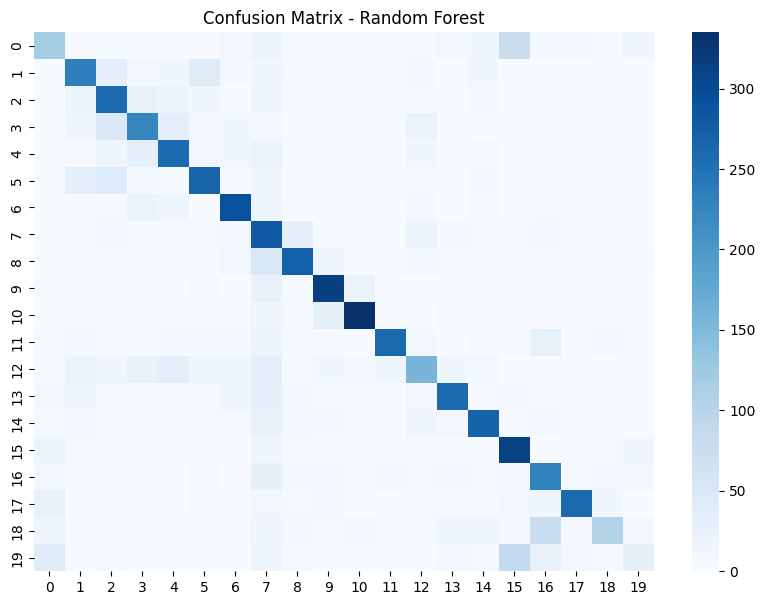

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Accuracy: 0.6054

🔹 Classification Report for XGBoost:
                          precision    recall  f1-score   support

             alt.atheism       0.43      0.35      0.38       319
           comp.graphics       0.57      0.63      0.60       389
 comp.os.ms-windows.misc       0.57      0.58      0.57       394
comp.sys.ibm.pc.hardware       0.59      0.57      0.58       392
   comp.sys.mac.hardware       0.64      0.66      0.65       385
          comp.windows.x       0.74      0.64      0.69       395
            misc.forsale       0.72      0.71      0.71       390
               rec.autos       0.62      0.60      0.61       396
         rec.motorcycles       0.41      0.73      0.52       398
      rec.sport.baseball       0.73      0.70      0.71       397
        rec.sport.hockey       0.81      0.78      0.80       399
               sci.crypt       0.77      0.64      0.70       396
         sci.electronics       0.45      0.47      0.46       393
          

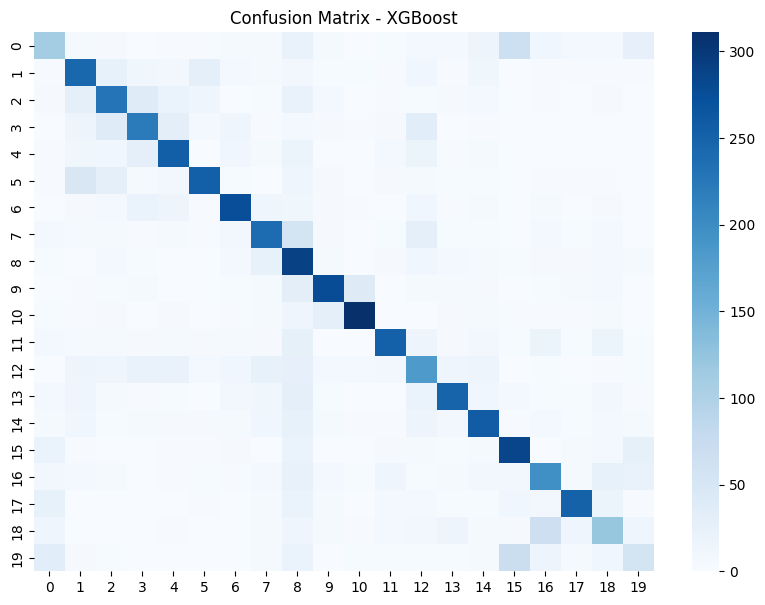

In [ ]:

# Logistic regression
lr_model = train_logistic_regression(X_train_tfidf, y_train)
acc_lr = evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression")

# Naive Bayes
nb_model = train_naive_bayes(X_train_tfidf, y_train)
acc_nb = evaluate_model(nb_model, X_test_tfidf, y_test, "Naive Bayes")

# Support vector machine
svm_model = train_svm(X_train_tfidf, y_train)
acc_svm = evaluate_model(svm_model, X_test_tfidf, y_test, "Support Vector Machine")

# Random Forest
rf_model = train_random_forest(X_train_tfidf, y_train)
acc_rf = evaluate_model(rf_model, X_test_tfidf, y_test, "Random Forest")

# XGBoost
xgb_model = train_xgboost(X_train_tfidf, y_train)
acc_xgb = evaluate_model(xgb_model, X_test_tfidf, y_test, "XGBoost")


## 📈 5. Performance Comparison

<ipython-input-10-33ebad0e9485>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names_extended, y=accuracies_extended, palette='viridis')


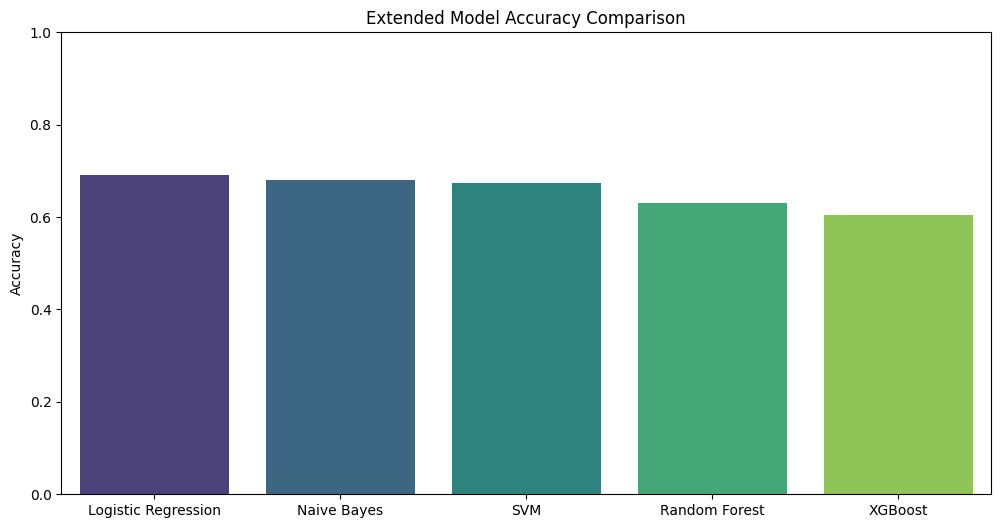

In [ ]:
# Include Logistic Regression and SVM results
model_names_extended = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost']
accuracies_extended = [acc_lr, acc_nb, acc_svm, acc_rf, acc_xgb]

plt.figure(figsize=(12,6))
sns.barplot(x=model_names_extended, y=accuracies_extended, palette='viridis')
plt.title("Extended Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()



<ipython-input-11-b31096a7af59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names_extended, y=accuracies_extended, palette='viridis')


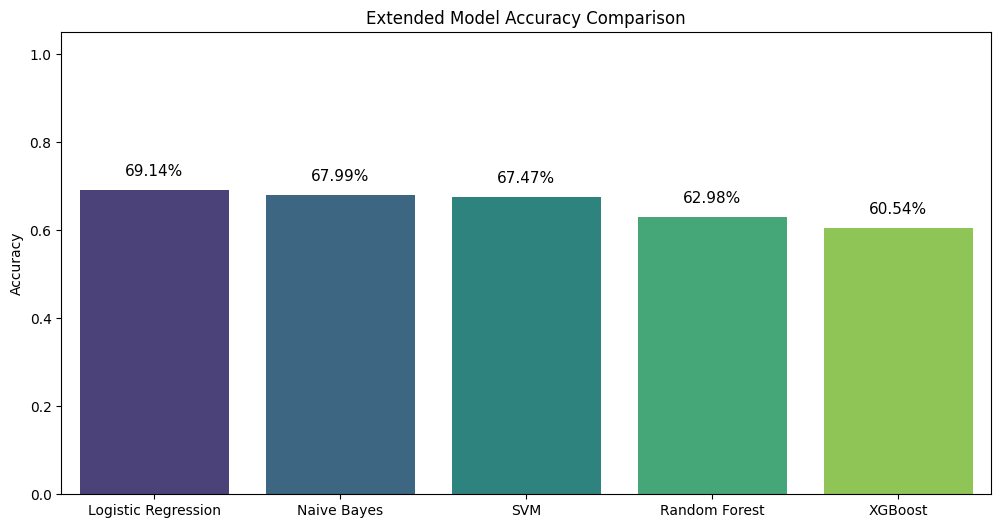

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=model_names_extended, y=accuracies_extended, palette='viridis')

# Add accuracy labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title("Extended Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.show()


## 🧠 Observations and Recommendations

### Key Takeaways:
- LR and Naive Bayes often perform **surprisingly well** on text classification with TF-IDF.
- Random Forest may struggle with **sparse high-dimensional data** like TF-IDF.
- XGBoost tends to offer **better accuracy** but is computationally heavier.

### Suggested Next Steps:
🔧 Tune hyperparameters (e.g., regularization for LR, kernel type for SVM, tree depth for RF/XGB).

🧪 Try alternative feature extraction like CountVectorizer, character-level n-grams, or embeddings.

🎯 Test on a subset of categories (e.g., comp.* vs rec.*) to evaluate model performance in specific contexts.

🧠 Consider using dimensionality reduction techniques (e.g., TruncatedSVD) for non-linear models.

📈 Implement cross-validation for more robust evaluation.

---

